We are going to predict the demand for bikes in the capitalbikeshare system

Steps: 
1) Retreiving and reading the data

2) Preliminary analysis of the data and drop obvious features

3) visualize the data

4) Check multiple linear regression assumptions

5) Drop irrelevent features

6) create/modify more features

7) Create dummy variables

8) train and test split

9) fit and score the model

10) present the results

In [1]:
# Step 0 - import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Step 1 - Read Data using Pandas

In [2]:
bikes = pd.read_csv('hour.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Step 2 - Premliminary analysis and reature selection


In [3]:
#drop unnecessary data using "drop" meathod
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','date','casual', 'registered'], axis = 1)
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
#check for missing values
bikes_prep.isnull().sum()
#no missing data

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

# Step 3 - Visualizations


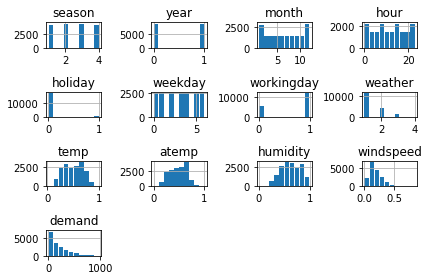

In [5]:
#visualize the data using pandas histogram
bikes_prep.hist(rwidth = 0.9)
#the histograms overlaps so we use plt.tight_layout to organize
plt.tight_layout()

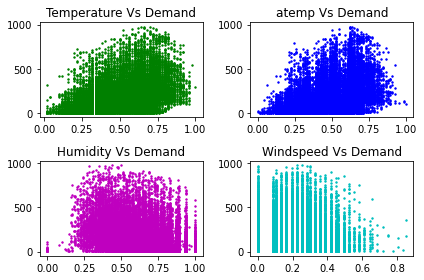

In [6]:
#visualize the continuous features vs demand
plt.subplot(2, 2, 1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s = 2, c = 'g')

plt.subplot(2, 2, 2)
plt.title('atemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s = 2, c = 'b')

plt.subplot(2, 2, 3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s = 2, c = 'm')

plt.subplot(2, 2, 4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s = 2, c = 'c')

plt.tight_layout()

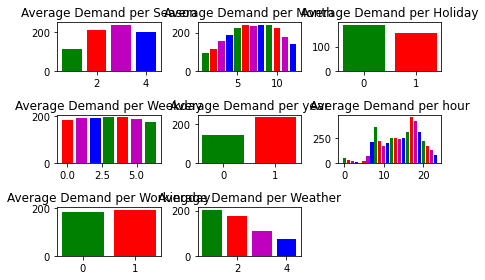

In [7]:
#Plot the categorical features vs demand

# Create a 3 X 3 subplot
plt.subplot(3,3,1)
plt.title('Average Demand per Season')

#Create a list of unique seasons's values
cat_list = bikes_prep['season'].unique()

# Create average demand per season using 'groupby'
cat_average = bikes_prep.groupby('season').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colors)


plt.subplot(3,3,2)
plt.title('Average Demand per Month')

#Create a list of unique Month values
cat_list = bikes_prep['month'].unique()

# Create average demand per month using 'groupby'
cat_average = bikes_prep.groupby('month').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colors)


plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')

#Create a list of unique holiday values
cat_list = bikes_prep['holiday'].unique()

# Create average demand per holiday using 'groupby'
cat_average = bikes_prep.groupby('holiday').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colors)
          

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')

#Create a list of unique weekday values
cat_list = bikes_prep['weekday'].unique()

# Create average demand per weekday using 'groupby'
cat_average = bikes_prep.groupby('weekday').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colors)
          

plt.subplot(3,3,5)
plt.title('Average Demand per year')

#Create a list of unique year values
cat_list = bikes_prep['year'].unique()

# Create average demand per year using 'groupby'
cat_average = bikes_prep.groupby('year').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colors)


plt.subplot(3,3,6)
plt.title('Average Demand per hour')

#Create a list of unique hour values
cat_list = bikes_prep['hour'].unique()

# Create average demand per hour using 'groupby'
cat_average = bikes_prep.groupby('hour').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')

#Create a list of unique workingday values
cat_list = bikes_prep['workingday'].unique()

# Create average demand per workingday using 'groupby'
cat_average = bikes_prep.groupby('workingday').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colors)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')

#Create a list of unique weather values
cat_list = bikes_prep['weather'].unique()

# Create average demand per weather using 'groupby'
cat_average = bikes_prep.groupby('weather').mean()['demand']

colors = ['g', 'r', 'm', 'b']
plt.bar(cat_list, cat_average, color = colors)
plt.tight_layout()

Features that can be dropped:
 - weekday: there is no differnce in demand depending on the weekday therefore it is not needed
 - Year: we are only limited to two years of data therefore it is not strong data
 - workingday: there is no change in demand whether it is a workingday or weekend
 

# Data Visualization Results
 - the demand is not normally distributed
 - Temperature and demand appear to have direct correlation
 - The plot for temp and atemp appear almost identical
 - Humidity and wind speed affect demand
 further analysis is needed
 
 We see there is variation in demand based on: 
 - season
 - month
 - Holiday
 - Hour
 - Weather
 
there was no significant change in demand due to weekday or working day
Year-wise growth pattern not considered due to limited number of years


# Check for outliers

In [8]:
#Use the ".describe()" function to see common statistics of "demand"
bikes_prep['demand'].describe()


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [9]:
bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

#  Step 4 - Check Multiple Linear Regression Assumptions


In [10]:
#Linearity using correlation coefficient matrix using 'corr()'
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed','demand']].corr()
print(correlation)

               temp     atemp  humidity  windspeed    demand
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
humidity  -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
demand     0.404772  0.400929 -0.322911   0.093234  1.000000


According to this matrix atemp and windspeed can be dropped.

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1d7f05afa60>)

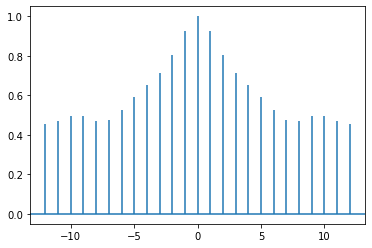

In [11]:
#check the autocorrelation in demand using "accor"
df1 = pd.to_numeric(bikes_prep['demand'], downcast = 'float')
plt.acorr(df1, maxlags = 12)

There is high autocrrelation for the demand feature

From the Data Visualization results we see that demand is not normal distributed

To fix this we convert the values to their "log normal distribution"

# Step 6 - Create/Modify new features

<AxesSubplot:>

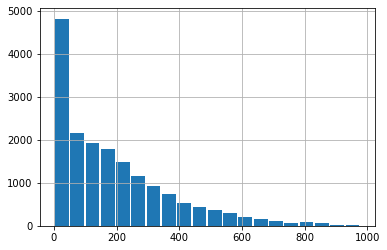

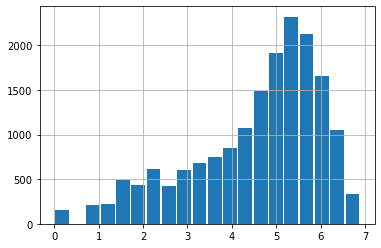

In [12]:
#log normalise the feature demand
df1 = bikes_prep['demand']

#to convert values to their log values we use numpy's 'log' function
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth = 0.9,bins = 20)

plt.figure()
df2.hist(rwidth = 0.9,bins = 20)

In [13]:
#convert 'demand' to log 
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [14]:
#autocorrelation in the demand column
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+1).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+1).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis = 1)

bikes_prep_lag.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand,t-1,t-2,t-3
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,2.772589,NaN,NaN,NaN
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,3.688879,2.772589,2.772589,2.772589
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,3.465736,3.688879,3.688879,3.688879
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,2.564949,3.465736,3.465736,3.465736
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.000000,2.564949,2.564949,2.564949


In [15]:
#drop 'nan values'
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand,t-1,t-2,t-3
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,3.688879,2.772589,2.772589,2.772589
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,3.465736,3.688879,3.688879,3.688879
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,2.564949,3.465736,3.465736,3.465736
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0.000000,2.564949,2.564949,2.564949
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0.000000,0.000000,0.000000,0.000000


# Step 7 - Create Dummy Variables and drop first to avoid dummy variable trap using 'get_dummies'

In [16]:
#Check what type the data, we need to make sure it is in category type
bikes_prep_lag.dtypes

season          int64
year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
demand        float64
t-1           float64
t-2           float64
t-3           float64
dtype: object

In [17]:
#convert the data to category type using 'astype'function
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first = True)

In [19]:
bikes_prep_lag.head()

,year,weekday,workingday,temp,atemp,humidity,windspeed,demand,t-1,t-2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
1,0,6,0,0.22,0.2727,0.80,0.0000,3.688879,2.772589,2.772589,...,0,0,0,0,0,0,0,0,0,0
2,0,6,0,0.22,0.2727,0.80,0.0000,3.465736,3.688879,3.688879,...,0,0,0,0,0,0,0,0,0,0
3,0,6,0,0.24,0.2879,0.75,0.0000,2.564949,3.465736,3.465736,...,0,0,0,0,0,0,0,0,0,0
4,0,6,0,0.24,0.2879,0.75,0.0000,0.000000,2.564949,2.564949,...,0,0,0,0,0,0,0,0,0,0
5,0,6,0,0.24,0.2576,0.75,0.0896,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0


# Step 8 - Create train and test split

Because our feature demand is of time series data which has autocorrelation, we split the data by the beginning data and the ending data

demand is time dependent or time series

In [25]:
#Split the X and Y dataset into training and testing set
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis = 1)

In [29]:
#Create the training set

#Creat the size for 70% of the data
tr_size = 0.7 * len(X)
tr_size= int(tr_size)
tr_size

12164

In [30]:
#Create the train and the test using the tr_size
X_train = X.values[0: tr_size]
X_test = X.values[tr_size: len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

# Step 9 - Fit and Score the model

In [33]:
#import Linear Regression
from sklearn.linear_model import LinearRegression

In [34]:
std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)
#calculate the r-squared values
r2_train = std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test)

#Create Y predictions
Y_predict = std_reg.predict(X_test)


In [36]:
from sklearn.metrics import mean_squared_error
#calculate the rmse
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))
rmse

0.3905615829462639

In [37]:

print('r2_train is: ', r2_train)
print('r2_test is: ', r2_test)
print('the rmse is: ', rmse)

r2_train is:  0.9127646440581111
r2_test is:  0.9250778171039227
the rmse is:  0.3905615829462639


We have a high r-squared value and a relatively low rmse, which means our model is accurate

# Final Step - Run RMSLE and compare results

In [42]:
Y_test_e = []
Y_predict_e = []
for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

In [43]:
#Do the sum of the logs and squares
log_sq_sum = 0
for i in range (0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a) **2
    log_sq_sum = log_sq_sum + log_diff
rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.3668065831952628
